# 9과 이변량_범주 vs 범주

## 1.환경준비

* 라이브러리 불러오기

In [ ]:
import pandas as pd
import numpy as np
import random as rd

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic      #mosaic plot!

import scipy.stats as spst

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


* 데이터 불러오기 : 다음의 예제 데이터를 사용합니다.
> 타이타닉 생존자  


In [ ]:
# 타이타닉 데이터
titanic = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic.1.csv')
titanic.head()

,PassengerId,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Family,Mother,Fare2
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Age_20,2,0,7.2500
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C,Age_30,2,0,71.2833
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Age_20,1,0,7.9250
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S,Age_30,2,0,53.1000
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S,Age_30,1,0,8.0500


## 2.교차표(pd.crosstab)

범주 vs 범주 를 비교하고 분석하기 위해서는 먼저 **교차표**를 만들어야 합니다.

* pd.crosstab(행, 열)

In [ ]:
# 두 범주별 빈도수를 교차표로 만들어 봅시다.
pd.crosstab(titanic['Survived'], titanic['Sex'])

Sex,female,male
Survived,,
0,81,468
1,233,109


* pd.crosstab(행, 열, normalize =   )

<img src='https://github.com/DA4BAM/image/blob/main/crosstab.png?raw=true' width=700/>


In [ ]:
pd.crosstab(titanic['Survived'], titanic['Embarked'], normalize = 'columns')

Embarked,C,Q,S
Survived,,,
0,0.446429,0.61039,0.660991
1,0.553571,0.38961,0.339009


In [ ]:
pd.crosstab(titanic['Survived'], titanic['Embarked'], normalize = 'index')

Embarked,C,Q,S
Survived,,,
0,0.136612,0.085610,0.777778
1,0.271930,0.087719,0.640351


In [ ]:
pd.crosstab(titanic['Survived'], titanic['Embarked'], normalize = 'all')

Embarked,C,Q,S
Survived,,,
0,0.084175,0.05275,0.479237
1,0.104377,0.03367,0.245791


## 3.시각화
* 100% Stacked Bar
* mosaic

1) Pclass --> Survived

* 100% Stacked Bar
    * 먼저 crosstab으로 집계 : pd.crosstab(**feature**, **target**, normalize = **'index'**)
    * .plot.bar(stacked = true)
    * 전체 평균선 : plt.axhline()

Survived         0         1
Pclass                      
1         0.370370  0.629630
2         0.527174  0.472826
3         0.757637  0.242363


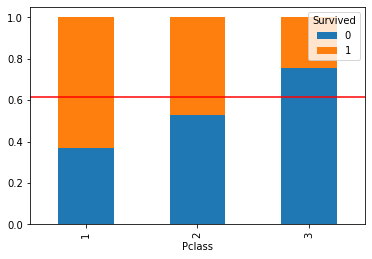

In [ ]:
temp = pd.crosstab(titanic['Pclass'], titanic['Survived'], normalize = 'index')
print(temp)
temp.plot.bar(stacked=True)
plt.axhline(1-titanic['Survived'].mean(), color = 'r')
plt.show()

비율만 비교하므로 양에 대한 비교는 할 수 없다!

* mosaic plot
    * mosaic(dataframe, [ feature, target])

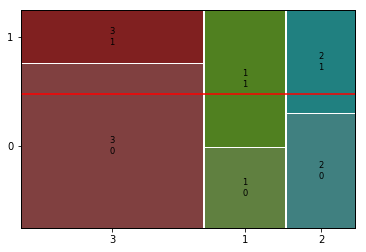

In [ ]:
# Pclass별 생존여부를 mosaic plot으로 그려 봅시다.
mosaic(titanic, [ 'Pclass','Survived'])
plt.axhline(1- titanic['Survived'].mean(), color = 'r')
plt.show()

① X축 길이는 각 객실등급별 승객비율을 나타냅니다.  
② 그 중 3등급 객실에 대해서 보면, y축의 길이는, 3등급 객실 승객 중에서 사망, 생존 비율을 의미합니다.

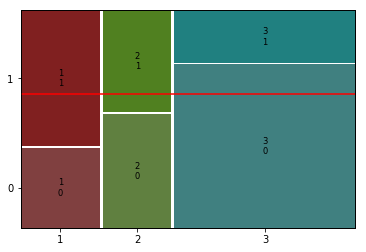

In [ ]:
# 저장된 값 순서대로 보여집니다. 
# 정렬하고 싶으면 .sort_values를 이용하면 됩니다.
# 사이 간격도 gap 옵션으로 조정 가능합니다.

mosaic(titanic.sort_values(['Pclass', 'Survived']), [ 'Pclass','Survived'], gap = 0.01)
plt.axhline(1- titanic['Survived'].mean(), color = 'r')
plt.show()

### 실습
아래 관계에 대해서 교차표와 시각화(100% Stacked bar, mosaic)를 수행하고, feature와 target 간에 관계가 있는지 분석해 봅시다.


* Sex --> Survived

Survived         0         1
Sex                         
female    0.257962  0.742038
male      0.811092  0.188908


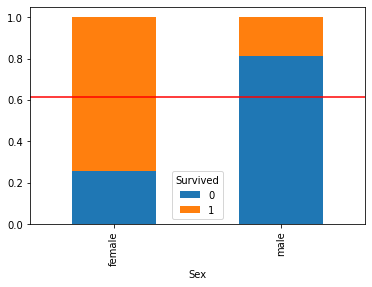

In [ ]:
temp = pd.crosstab(titanic['Sex'], titanic['Survived'], normalize = 'index')
print(temp)
temp.plot.bar(stacked=True)
plt.axhline(1-titanic['Survived'].mean(), color = 'r')
plt.show()

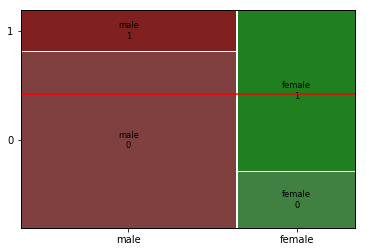

In [ ]:
mosaic(titanic, [ 'Sex','Survived'])
plt.axhline(1- titanic['Survived'].mean(), color = 'r')
plt.show()

* Embarked --> Survived

Survived         0         1
Embarked                    
C         0.446429  0.553571
Q         0.610390  0.389610
S         0.660991  0.339009


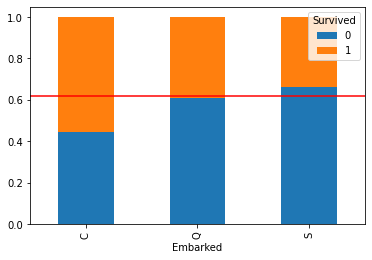

In [ ]:
temp = pd.crosstab(titanic['Embarked'], titanic['Survived'], normalize = 'index')
print(temp)
temp.plot.bar(stacked=True)
plt.axhline(1-titanic['Survived'].mean(), color = 'r')
plt.show()

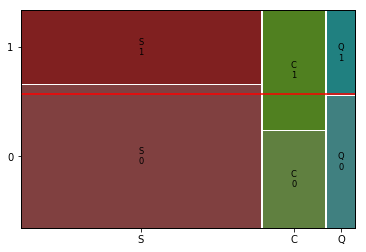

In [ ]:
mosaic(titanic, [ 'Embarked','Survived'])
plt.axhline(1- titanic['Survived'].mean(), color = 'r')
plt.show()

* Title --> Survived

Survived         0         1
Title                       
Master    0.439024  0.560976
Miss      0.297297  0.702703
Mr        0.839388  0.160612
Mrs       0.203125  0.796875
Others    0.785714  0.214286


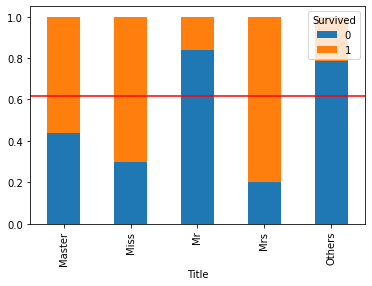

In [ ]:
temp = pd.crosstab(titanic['Title'], titanic['Survived'], normalize = 'index')
print(temp)
temp.plot.bar(stacked=True)
plt.axhline(1-titanic['Survived'].mean(), color = 'r')
plt.show()

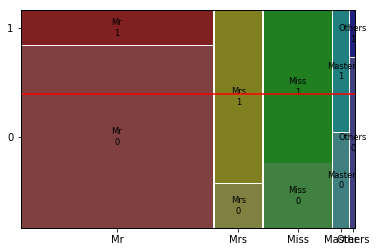

In [ ]:
mosaic(titanic, [ 'Title','Survived'])
plt.axhline(1- titanic['Survived'].mean(), color = 'r')
plt.show()

3) 시각화 결과를 분석하는 방법  
* 한가지만 기억하세요!  귀무가설이 참일 때 나올 그래프의 모양(아래 그림)
* 여기서 벗어나면, 차이가 있다. 관련이 있다는 말입니다.



<img src='https://github.com/DA4BAM/image/blob/main/%EB%AA%A8%EC%9E%90%EC%9D%B5.png?raw=true' width=700/>

* [참조] 모자익 플롯을 3 범주로 그리려면...

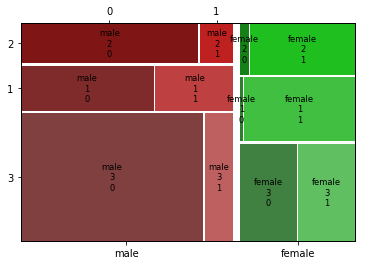

In [ ]:
# 세 범주로 그리려면...
mosaic(titanic, ['Sex','Pclass','Survived'], gap = 0.02)
plt.show()

## 4.수치화 : 카이제곱검정

* 카이제곱검정 : 범주형 변수들 사이에 어떤 관계가 있는지, 수치화 하는 방법

![image.png](https://github.com/DA4BAM/image/blob/main/%EC%B9%B4%EC%9D%B4%EC%A0%9C%EA%B3%B1%20%ED%86%B5%EA%B3%84%EB%9F%89.png?raw=true)

* 카이 제곱 통계량은
    * 클수록 기대빈도로부터 실제 값에 차이가 크다는 의미.
    * 계산식으로 볼 때, 범주의 수가 늘어날 수록 값은 커지게 되어 있음.
    * 보통, 자유도의 2~3배 보다 크면, 차이가 있다고 본다. 

* 범주형 변수의 자유도 : 범주의 수 - 1

* 카이제곱검정에서는
    * x 변수의 자유도 × y 변수의 자유도
    * 예 : Pclass --> Survived
        * Pclass : 범주가 3개, Survived : 2개
        * (3-1) * (2-1) = 2
        * 그러므로, 2의 2 ~ 3배인 4 ~ 6 보다 카이제곱 통계량이 크면, 차이가 있다고 볼수 있음.


* 타이타닉 데이터에서 객실등급과 생존여부 간의 카이제곱 검정을 수행해 봅시다.

In [ ]:
pd.crosstab(titanic['Survived'], titanic['Pclass'])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [ ]:
# 먼저 집계
table = pd.crosstab(titanic['Survived'], titanic['Pclass'])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

교차표
 Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119
----------------------------------------------------------------------------------------------------
카이제곱통계량 102.88898875696056
p-value 4.549251711298793e-23
기대빈도
 [[133.09090909 113.37373737 302.53535354]
 [ 82.90909091  70.62626263 188.46464646]]


In [ ]:
result

(102.88898875696056,
 4.549251711298793e-23,
 2,
 array([[133.09090909, 113.37373737, 302.53535354],
        [ 82.90909091,  70.62626263, 188.46464646]]))

### 실습
다음의 관계에 대해 수치화 해 봅시다.

* Sex --> Survived

In [ ]:
# 먼저 집계
table = pd.crosstab(titanic['Survived'], titanic['Sex'])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

교차표
 Sex       female  male
Survived              
0             81   468
1            233   109
----------------------------------------------------------------------------------------------------
카이제곱통계량 260.71702016732104
p-value 1.1973570627755645e-58
기대빈도
 [[193.47474747 355.52525253]
 [120.52525253 221.47474747]]


* Embarked --> Survived

In [ ]:
# 먼저 집계
table = pd.crosstab(titanic['Survived'], titanic['Embarked'])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

교차표
 Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  219
----------------------------------------------------------------------------------------------------
카이제곱통계량 25.964452881874784
p-value 2.3008626481449577e-06
기대빈도
 [[103.51515152  47.44444444 398.04040404]
 [ 64.48484848  29.55555556 247.95959596]]


* Title --> Survived

In [ ]:
# 먼저 집계
table = pd.crosstab(titanic['Survived'], titanic['Title'])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

교차표
 Title     Master  Miss   Mr  Mrs  Others
Survived                                
0             18    55  439   26      11
1             23   130   84  102       3
----------------------------------------------------------------------------------------------------
카이제곱통계량 289.1953165452417
p-value 2.318405007221846e-61
기대빈도
 [[ 25.26262626 113.98989899 322.25252525  78.86868687   8.62626263]
 [ 15.73737374  71.01010101 200.74747475  49.13131313   5.37373737]]


# 종합실습

## 1.환경준비

* 라이브러리 불러오기

In [ ]:
import pandas as pd
import numpy as np
import random as rd

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic      #mosaic plot!

import scipy.stats as spst

* 데이터 불러오기 : 다음의 예제 데이터를 사용합니다.
> 직원 이직 분석


In [ ]:
# 직원 이직 데이터
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Attrition_simple2.CSV'
data = pd.read_csv(path)  
data.head(5)

,Attrition,Age,DistanceFromHome,EmployeeNumber,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,PercentSalaryHike,TotalWorkingYears
0,0,33,7,817,Male,3,Married,11691,No,11,14
1,0,35,18,1412,Male,4,Single,9362,No,11,10
2,0,42,6,1911,Male,1,Married,13348,No,13,18
3,0,46,2,1204,Female,1,Married,17048,No,23,28
4,1,22,4,593,Male,3,Single,3894,No,16,4


## 2.교차표(pd.crosstab)
교차표를 연습해 봅시다.

① 성별(Gender)에 따른 이직여부(Attrition)의 관계를 교차표로 만들어 봅시다.
* 전체 갯수

In [ ]:
# 두 범주별 빈도수를 교차표로 만들어 봅시다.
pd.crosstab(data['Attrition'], data['Gender'])

Gender,Female,Male
Attrition,,
0,403,598
1,66,129


* 칼럼기준 비율

In [ ]:
pd.crosstab(data['Attrition'], data['Gender'], normalize = 'columns')

Gender,Female,Male
Attrition,,
0,0.859275,0.822558
1,0.140725,0.177442


* 행 기준 비율

In [ ]:
pd.crosstab(data['Attrition'], data['Gender'], normalize = 'index')

Gender,Female,Male
Attrition,,
0,0.402597,0.597403
1,0.338462,0.661538


* 전체 기준 비율

In [ ]:
pd.crosstab(data['Attrition'], data['Gender'], normalize = 'all')

Gender,Female,Male
Attrition,,
0,0.336957,0.50000
1,0.055184,0.10786


* 교차표를 통해 성별에 따라 이직여부가 관련 있다고 보이나요?
* 위 교차표 중 어떤 것이 성별-->이직여부 관련성을 확인하기에 적합한가요?

② 직무만족도에 따른 이직여부의 관계를 교차표로 만들어 봅시다.
* 전체 갯수

In [ ]:
# 두 범주별 빈도수를 교차표로 만들어 봅시다.
pd.crosstab(data['Attrition'], data['JobSatisfaction'])

JobSatisfaction,1,2,3,4
Attrition,,,,
0,191,189,295,326
1,52,37,59,47


* 칼럼기준 비율

In [ ]:
pd.crosstab(data['Attrition'], data['JobSatisfaction'], normalize = 'columns')

Pclass,1,2,3
Survived,,,
0,0.37037,0.527174,0.757637
1,0.62963,0.472826,0.242363


* 행 기준 비율

In [ ]:
pd.crosstab(data['Attrition'], data['JobSatisfaction'], normalize = 'index')

Pclass,1,2,3
Survived,,,
0,0.145719,0.176685,0.677596
1,0.397661,0.254386,0.347953


* 전체 기준 비율

In [ ]:
pd.crosstab(data['Attrition'], data['JobSatisfaction'], normalize = 'all')

Pclass,1,2,3
Survived,,,
0,0.089787,0.108866,0.417508
1,0.152637,0.097643,0.133558


* 교차표를 통해 직무만족도에 따라 이직여부가 관련 있다고 보이나요?
* 위 교차표 중 어떤 것이 직무만족도-->이직여부 관련성을 확인하기에 적합한가요?

③ 결혼상태에 따른 이직여부의 관계를 교차표로 만들어 봅시다.
* 전체 갯수

In [ ]:
# 두 범주별 빈도수를 교차표로 만들어 봅시다.
pd.crosstab(data['Attrition'], data['MaritalStatus'])

MaritalStatus,Divorced,Married,Single
Attrition,,,
0,241,479,281
1,23,69,103


* 칼럼기준 비율

In [ ]:
pd.crosstab(data['Attrition'], data['MaritalStatus'], normalize = 'columns')

Pclass,1,2,3
Survived,,,
0,0.37037,0.527174,0.757637
1,0.62963,0.472826,0.242363


* 행 기준 비율

In [ ]:
pd.crosstab(data['Attrition'], data['MaritalStatus'], normalize = 'index')

Pclass,1,2,3
Survived,,,
0,0.145719,0.176685,0.677596
1,0.397661,0.254386,0.347953


* 전체 기준 비율

In [ ]:
pd.crosstab(data['Attrition'], data['MaritalStatus'], normalize = 'all')

Pclass,1,2,3
Survived,,,
0,0.089787,0.108866,0.417508
1,0.152637,0.097643,0.133558


* 교차표를 통해 결혼상태에 따라 이직여부가 관련 있다고 보이나요?
* 위 교차표 중 어떤 것이 결혼상태-->이직여부 관련성을 확인하기에 적합한가요?

④ 성별, 직무만족도, 결혼상태 중 어떤 변수가 이직여부를 예측하는데 더 중요한 변수인가요?

## 3.시각화 : bar chart, mosaic

① Gender --> Attrition
* 100% bar chart을 그려봅시다. 

Attrition         0         1
Gender                       
Female     0.859275  0.140725
Male       0.822558  0.177442


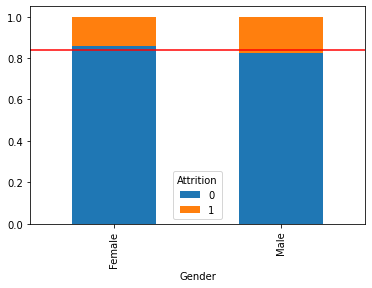

In [ ]:
temp = pd.crosstab(data['Gender'], data['Attrition'], normalize = 'index')
print(temp)
temp.plot.bar(stacked=True)
plt.axhline(1-data['Attrition'].mean(), color = 'r')
plt.show()

* 모자익 플롯을 그려봅시다.

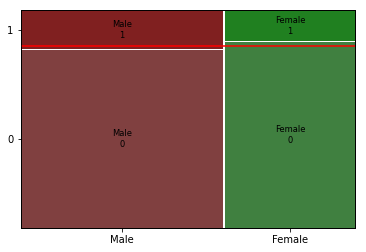

In [ ]:
mosaic(data, [ 'Gender','Attrition'])
plt.axhline(1- data['Attrition'].mean(), color = 'r')
plt.show()

* 두 차트로 볼 때, 성별에 따라 이직여부가 달라지나요?

② JobSatisfaction --> Attrition
* 100% bar chart을 그려봅시다. 

Attrition               0         1
JobSatisfaction                    
1                0.786008  0.213992
2                0.836283  0.163717
3                0.833333  0.166667
4                0.873995  0.126005


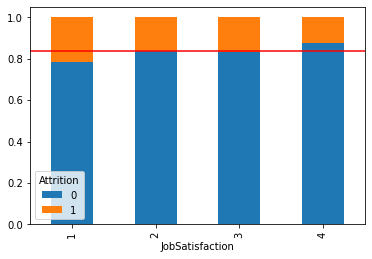

In [ ]:
temp = pd.crosstab(data['JobSatisfaction'], data['Attrition'], normalize = 'index')
print(temp)
temp.plot.bar(stacked=True)
plt.axhline(1-data['Attrition'].mean(), color = 'r')
plt.show()

* 모자익 플롯을 그려봅시다.

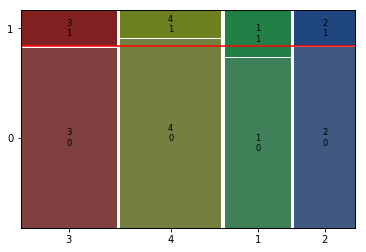

In [ ]:
mosaic(data, [ 'JobSatisfaction','Attrition'], gap = .01)
plt.axhline(1- data['Attrition'].mean(), color = 'r')
plt.show()

* 두 차트로 볼 때, 직무만족도에 따라 이직여부가 달라지나요?

③ MaritalStatus --> Attrition
* 100% bar chart을 그려봅시다. 

Attrition             0         1
MaritalStatus                    
Divorced       0.912879  0.087121
Married        0.874088  0.125912
Single         0.731771  0.268229


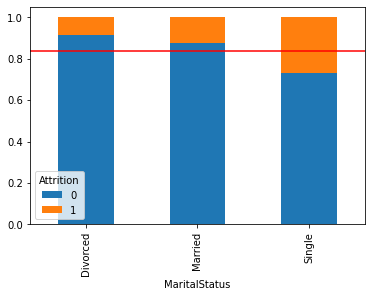

In [ ]:
temp = pd.crosstab(data['MaritalStatus'], data['Attrition'], normalize = 'index')
print(temp)
temp.plot.bar(stacked=True)
plt.axhline(1-data['Attrition'].mean(), color = 'r')
plt.show()

* 모자익 플롯을 그려봅시다.

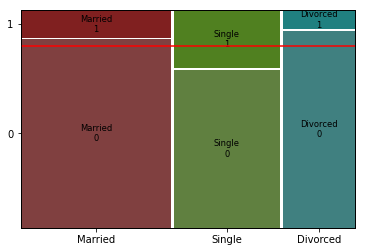

In [ ]:
mosaic(data, [ 'MaritalStatus','Attrition'], gap = .01)
plt.axhline(1- data['Attrition'].mean(), color = 'r')
plt.show()

* 두 차트로 볼 때, 직무만족도에 따라 이직여부가 달라지나요?

## 4.수치화 : 카이제곱검정

① Gender --> Attrition

In [ ]:
# 먼저 집계
table = pd.crosstab(data['Attrition'], data['Gender'])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

교차표
 Gender     Female  Male
Attrition              
0             403   598
1              66   129
----------------------------------------------------------------------------------------------------
카이제곱통계량 2.5537631338119975
p-value 0.1100318964829815
기대빈도
 [[392.5326087 608.4673913]
 [ 76.4673913 118.5326087]]


② JobSatisfaction --> Attrition

In [ ]:
# 먼저 집계
table = pd.crosstab(data['Attrition'], data['JobSatisfaction'])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

교차표
 JobSatisfaction    1    2    3    4
Attrition                          
0                191  189  295  326
1                 52   37   59   47
----------------------------------------------------------------------------------------------------
카이제곱통계량 8.40684948576828
p-value 0.0383107376547955
기대빈도
 [[203.38043478 189.15217391 296.2826087  312.18478261]
 [ 39.61956522  36.84782609  57.7173913   60.81521739]]


③ MaritalStatus --> Attrition

In [ ]:
# 먼저 집계
table = pd.crosstab(data['Attrition'], data['MaritalStatus'])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

교차표
 MaritalStatus  Divorced  Married  Single
Attrition                               
0                   241      479     281
1                    23       69     103
----------------------------------------------------------------------------------------------------
카이제곱통계량 47.82247929575401
p-value 4.12553775054082e-11
기대빈도
 [[220.95652174 458.65217391 321.39130435]
 [ 43.04347826  89.34782609  62.60869565]]


In [ ]:
# 한꺼번에 비교
vars = ['Gender','JobSatisfaction','MaritalStatus','OverTime']

for v in vars :
    table = pd.crosstab(data['Attrition'], data[v])
    result = spst.chi2_contingency(table)
    print(v)
    print("카이제곱통계량 : {:.4f}".format(result[0]))
    print("p-value : {:.20f}".format(result[1]))
    print('--------------------------------------')


Gender
카이제곱통계량 : 2.5538
p-value : 0.11003189648298150605
--------------------------------------
JobSatisfaction
카이제곱통계량 : 8.4068
p-value : 0.03831073765479550003
--------------------------------------
MaritalStatus
카이제곱통계량 : 47.8225
p-value : 0.00000000004125537751
--------------------------------------
OverTime
카이제곱통계량 : 71.2847
p-value : 0.00000000000000003092
--------------------------------------
